###                                        Assignment 1

Gradient Descent:
Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning models. The primary goal is to find the optimal set of parameters (weights) that minimize the error between the predicted and actual outputs.

How Gradient Descent Works:

	Initialization: Start with an initial set of parameters (weights), usually initialized randomly.
	Compute Gradient: Calculate the gradient of the cost function with respect to each parameter. The gradient indicates the direction of the steepest ascent of the cost function.
	Update Parameters: Update the parameters by moving in the direction opposite to the gradient. This step is repeated iteratively until the cost function converges to a minimum value.
The update rule for each parameter θ is:

 θ= θ-α.∂J(θ)/ ∂J(θ) Where:
 
	1.α  Is the learning rate, a hyper parameter that controls the step size
	2.J(θ) is the cost function.
	3.∂J(θ)/ ∂J(θ) is the gradient of the cost function with respect to the parameter θ

Types of Gradient Descent:

	Batch Gradient Descent:
	Uses the entire dataset to compute the gradient of the cost function.
	Pros: Provides a stable convergence since it uses all data points.
	Cons: Computationally expensive for large datasets as it requires loading the entire dataset into memory.

	Stochastic Gradient Descent (SGD):
	Uses only one data point (sample) to compute the gradient at each iteration.
	Pros: Faster convergence since it updates parameters more frequently. Can handle large datasets as it processes one sample at a time.
	Cons: More fluctuation in the cost function, leading to a noisy path to the minimum.

	Mini-Batch Gradient Descent:
	Uses a small random subset (mini-batch) of the dataset to compute the gradient.
	Pros: Balances the trade-offs between batch and stochastic gradient descent. It is computationally efficient and provides a more stable convergence than SGD.
	Cons: Requires choosing an appropriate mini-batch size, which can be tricky.


## Validation Set:

A validation set is a subset of the dataset used to tune hyper parameters and evaluate the performance of a model during training. Unlike the training set, which is used to fit the model, and the test set, which is used to assess the final model performance, the validation set helps in:
Preventing overfitting by providing an unbiased evaluation of the model fit on the training dataset.
Fine-tuning hyper parameters such as the learning rate, regularization parameters, and the architecture of neural networks.
	
## Validation Loss:

Validation loss is the cost calculated on the validation set. It serves as an indicator of how well the model is generalizing to unseen data. During training, the model's performance is monitored on both the training and validation sets:

	1.Training Loss: The cost calculated on the training set. It typically decreases as the model learns the patterns in the training data.
	2.Validation Loss: The cost calculated on the validation set. It is used to detect overfitting. If the validation loss starts increasing while the training loss continues to decrease, it indicates that the model is overfitting to the training data.




In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 604ms/step - loss: 10.0992 - val_loss: 7.3457
Epoch 2/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.0358 - val_loss: 6.1922
Epoch 3/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2986 - val_loss: 5.0494
Epoch 4/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3247 - val_loss: 3.9398
Epoch 5/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2824 - val_loss: 2.9645
Epoch 6/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.7334 - val_loss: 2.2730
Epoch 7/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.2658 - val_loss: 1.9425
Epoch 8/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.7827 - val_loss: 1.9561
Epoch 9/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3369 - val_loss: 2.0736
Epoch 10/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3123 - val_loss: 2.0911
Epoch 11/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4575 - val_loss: 2.0306
Epoch 12/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0144 - val_

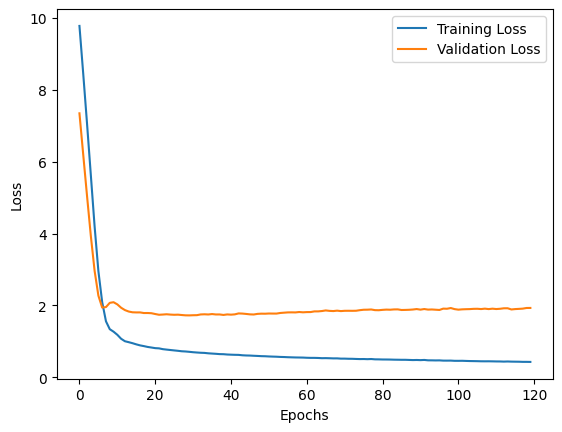

In [5]:
# Load Tips Data from Seaborn
tips = sns.load_dataset('tips')

# Preprocess the Data
# Convert categorical columns to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Separate features and target
X = tips.drop('tip', axis=1)
y = tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the MLP Model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the Model
model.compile(optimizer='adam', loss='mse')

# Train the Model
history = model.fit(X_train, y_train, epochs=120, validation_split=0.2, batch_size=32)

# Evaluate the Model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Visualize Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()